# <font color='navy'> <center>Clustering – Mall Customer Segmentation Project
   

### <center> By Viha Sharma

# TABLE OF CONTENTS

<div class='alert alert-warning'>
    
1. Import dependencies and load the dataset   

    
2. Perform exploratory data analysis:     
    a. Dataset overview      
    b. Profile report generation      
    c. Univariate analysis     
    d. Bivariate analysis  
    
    
3. Data Preprocessing   
    a. Missing Value Treatment   
    b. Encode Categorical features into numerical features    
    c. Scaling dataset    
    d. Creating correlation heatmap   

    
4. Model Building  
    
    1. KMeans Clustering   
    
        (i) Features of the model   
        (ii) Hyperparameter tuning - finding the optimal K value   
            - Graphing inertia using the Elbow Method    
            - Silhouette Score graph   
        (iv) Rebuilding the KMeans model with k=5   
        (v) 2D Visualisations:    
                - Clustering with 2 columns - interactive chart   
                - Clustering with all features   
        (vi) 3D Visualisation - Age vs Income vs Spending Score   
        
    2. Hierarchical Clustering 
    
        (i) Selecting all columns    
        (ii) Dendrogram to determine the number of clusters    
        (iii) Visualisation    
        (iv) Selecting only 2 columns - Spending Scores and Annual Income    
        
    3. DBSCAN Clustering   
    
        (i) K-Distance graph to determine optimal epsilon distance    
        (ii) Hyperparameter tuning for min_samples     
        (iii) Creating the model
    
    
5. Model Prediction App    
    
</div>

In [2374]:
# Import dependencies

import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import ipywidgets as widgets
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans
import scipy.cluster.hierarchy as sch #for creating the dendrogram
from sklearn.cluster import AgglomerativeClustering #for hierarchical clustering
import math
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2375]:
#Load dataset

df= pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv'); df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# <font color='grey'> <center> I. Exploratory Data Analysis

In [2376]:
def dataset_overview(df):
    print('\033[1;36mINITIAL DATASET OVERVIEW\033[0m')
    print('\033[1;3m1. Number of records:\033[0m',df.shape[0])
    print(' — — — — -')
    print('\033[1;3m2. Number of features:\033[0m', df.shape[1])
    print(' — — — — -')
    print('\033[1;3m3. Basic overview:\033[0m')
    print(df.info())
    print(' — — — — -')
    print('\033[1;3m4. Statistical summary:\033[0m\n',df.describe())
    print(' — — — — -')
    print('\033[1;3m5. Data types:\033[0m\n', df.dtypes)
    print(' — — — — -')
    print('\033[1;3m6. First 5 records:\033[0m\n',df.head())
    print(' — — — — -')
    print('\033[1;3m7. Last 5 records:\033[0m\n', df.tail())

In [2377]:
dataset_overview(df)

INITIAL DATASET OVERVIEW
1. Number of records: 200
 — — — — -
2. Number of features: 5
 — — — — -
3. Basic overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
 — — — — -
4. Statistical summary:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.00000

In [2378]:
profile = ProfileReport(df); profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# <font color='grey'> Extracting Numerical and Non-numerical columns

In [2379]:
numerical = [x for x in df.columns if df[x].dtype != 'object']
obj = [x for x in df.columns if df[x].dtype == 'object']

In [2380]:
print('Numerical Columns:\n', numerical)

Numerical Columns:
 ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [2381]:
print('Non-numerical Columns:\n', obj)

Non-numerical Columns:
 ['Gender']


# <font color='grey'> Data Visualisation - Univariate Analysis

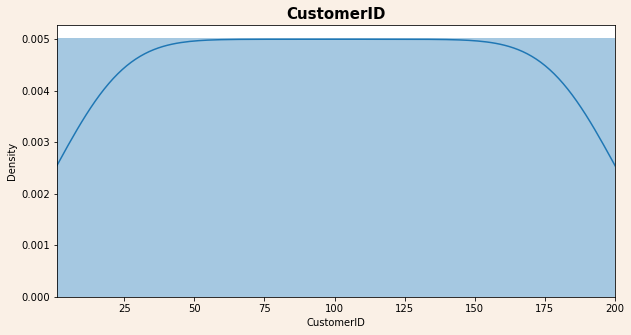

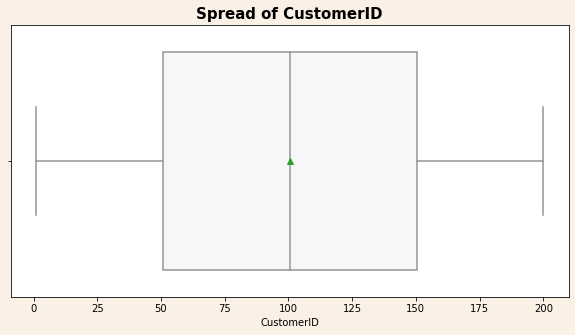

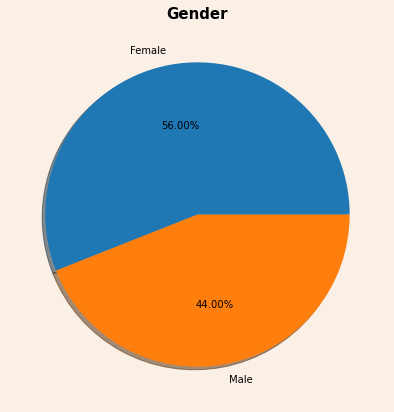

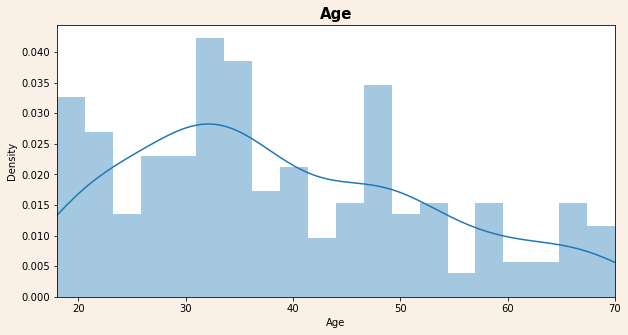

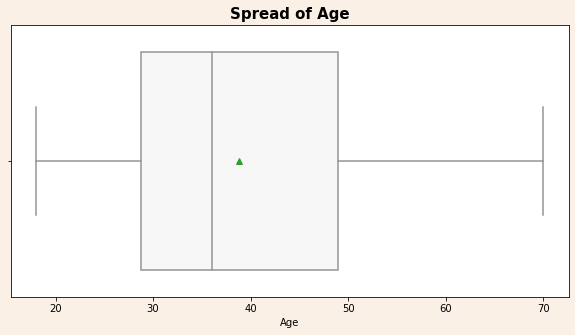

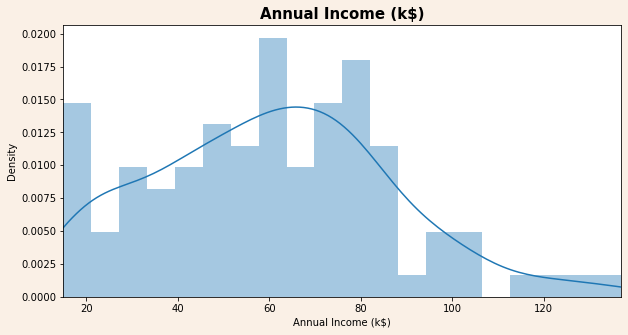

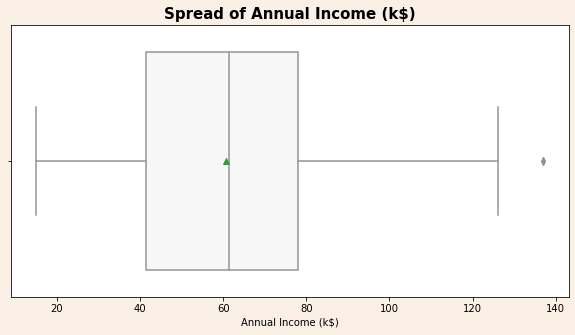

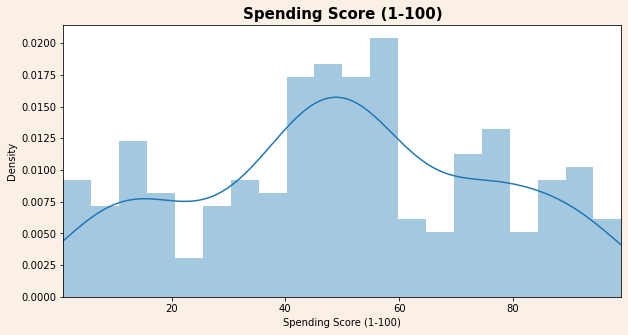

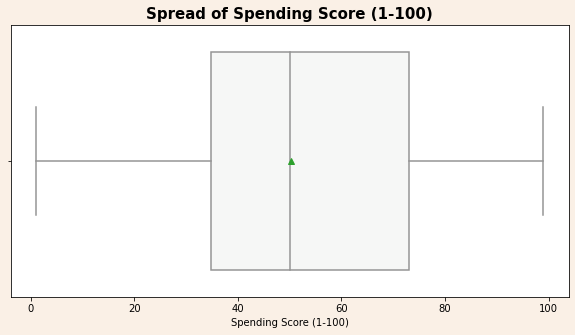

In [2382]:
for i in df:    
    if i in numerical:
        plt.subplots(figsize=(10,5), facecolor='linen')
        plt.title(i, fontweight='bold', size=15)
        sb.distplot(df[i] , bins = 20)
        plt.xlim(df[i].min(), df[i].max())
        plt.subplots(figsize=(10,5), facecolor='linen')
        sb.boxplot(df[i], palette='PRGn', showmeans=True)
        plt.title(f'Spread of {i}', size=15, fontweight='bold')
    elif i in obj:
        plt.subplots(figsize=(15,7), facecolor='linen')
        plt.title(i, fontweight='bold', size=15)
        plt.pie(df[i].value_counts(), labels = df[i].value_counts().index, autopct = '%.2f%%', shadow=True)

# Inferences

<div class = 'alert alert-warning'>
    
1. **CustomerID : Customer unique identification number**   
    There are 200 total customers.
    
    
2. **Age : Age of the customer**  
    There is a high number of customer between the age of 25 to 40 years. This data is right skewed, implying a possibility of outliers
    
    
3. **Gender : Gender of the customer**  
    There are more females than males in this dataset. 
    
    
4. **Annual Income (k$) : Annual income of the customer (in thousands)**    
    Ranges from USD 26k to 137k, with a mean of USD 60k. There is one outlier in this feature.
    
    
5. **Spending Score (1-100) : Spending scores by customer to purchase products**   
    There is a higher number of customers who have a score between 30 to 70.
    

</div>

# <font color='grey'> Data Visualisation - Bivariate Analysis


**Comparing Numerical Features**

In [2383]:
dd1 = widgets.Dropdown(options = numerical, description='Column x')
dd2 = widgets.Dropdown(options=df, description='Column y')

ui = widgets.HBox([dd1,dd2], box_style='success')

In [2384]:
def draw_relplot(column1, column2):
    plt.figure(figsize=(15,8), facecolor='linen')
    plt.scatter(df[column1],df[column2] ,s = 200 , alpha = 0.6 ,edgecolor='black')
    plt.title(f'{column1} vs {column2}', fontweight='bold', size=20)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

In [2385]:
output = widgets.interactive_output(draw_relplot, {'column1': dd1, 'column2': dd2})

In [2386]:
display(ui, output)

HBox(box_style='success', children=(Dropdown(description='Column x', options=('CustomerID', 'Age', 'Annual Inc…

Output()

# Inference:
<div class ='alert alert-warning'> 
From the above interactive plot, we can determine that customerID and Annual Income (k$) give us clear clustering, when plotted against Spending Score. 

</div>

**Comparing categorical feature with spending score**

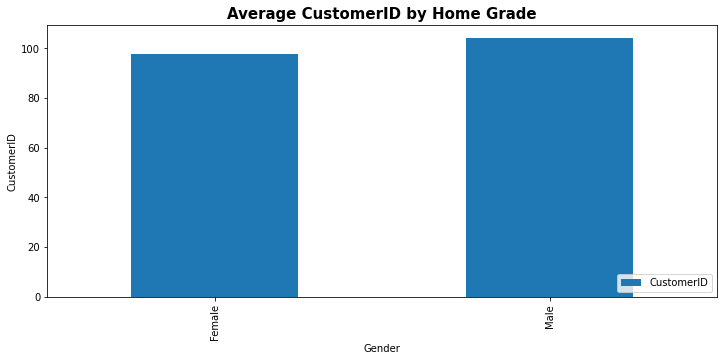

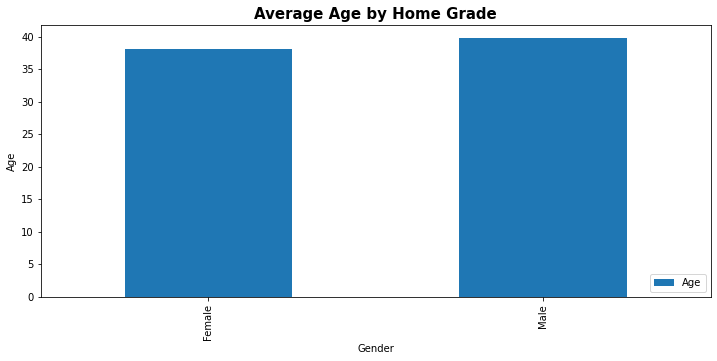

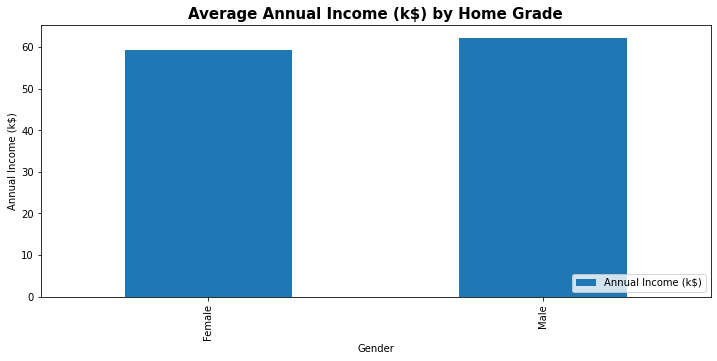

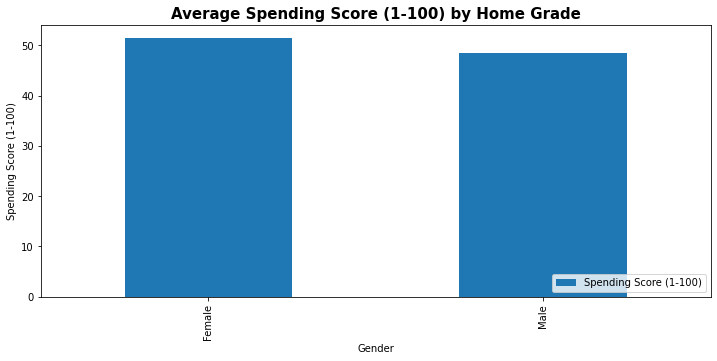

In [2387]:
for i in numerical:
    pd.DataFrame(df.groupby(df['Gender'])[i].mean()).plot(kind='bar', figsize=(12,5))
    plt.xlabel('Gender')
    plt.ylabel(i)
    plt.legend(loc='lower right')
    plt.title(f'Average {i} by Home Grade', fontweight='bold', size=15)
    plt.show()
    
#Note that the average customerID by Home grade visualisation can be ignored because it does not provide any useful inference.

# Inference: 
<div class='alert alert-warning'>
    
1. Females have a higher average spending score than males in our dataset. 
    
2. Females are older than females in our dataset.   
    
3. Males earn more annually than females.  
    
</div>

# <font color='grey'> Missing Value Treatment

In [2388]:
# No missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [2389]:
encoder = LabelEncoder()

for i in df:
    if i in obj:
        df[i+'_encoded'] = encoder.fit_transform(df[i]) #Male =1, Female=0
        df.drop(i, axis=1, inplace=True)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [2390]:
# SCALING

scaler=MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [2391]:
df_scaled

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded
0,0.000000,0.019231,0.000000,0.387755,1.0
1,0.005025,0.057692,0.000000,0.816327,1.0
2,0.010050,0.038462,0.008197,0.051020,0.0
3,0.015075,0.096154,0.008197,0.775510,0.0
4,0.020101,0.250000,0.016393,0.397959,0.0
...,...,...,...,...,...
195,0.979899,0.326923,0.860656,0.795918,0.0
196,0.984925,0.519231,0.909836,0.275510,0.0
197,0.989950,0.269231,0.909836,0.744898,1.0
198,0.994975,0.269231,1.000000,0.173469,1.0


<AxesSubplot:>

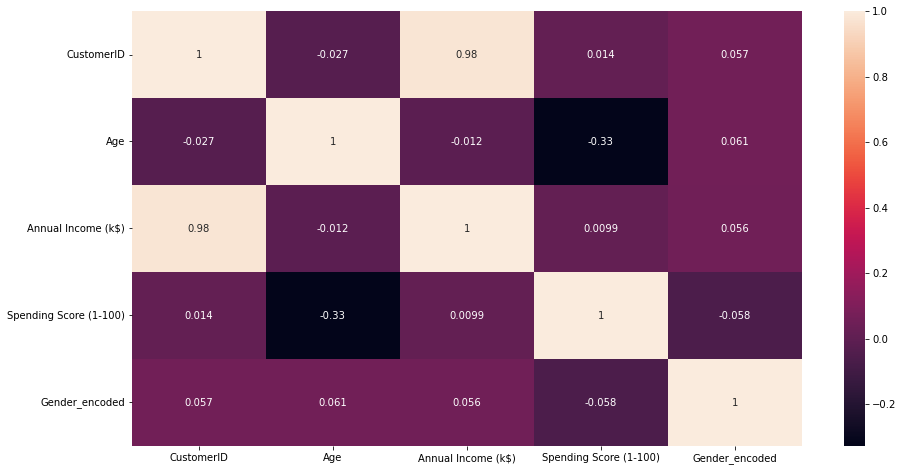

In [2392]:
plt.figure(figsize=(15,8))
sb.heatmap(df_scaled.corr(), annot=True)

# MODEL BUILDING

# <CENTER> 1. K MEANS CLUSTERING

In [2393]:
kmeans_model = KMeans(n_clusters = 5, random_state= 111)

In [2394]:
kmeans_model.fit(df)

KMeans(n_clusters=5, random_state=111)

# Features of our model

### A. CENTROIDS

In [2395]:
clusters = kmeans_model.cluster_centers_

cluster1 = clusters[0]
print('Coordinates of Cluster1:', cluster1)
cluster2 = clusters[1]
print('Coordinates of Cluster2:', cluster2)

Coordinates of Cluster1: [24.         25.52173913 26.30434783 78.56521739  0.39130435]
Coordinates of Cluster2: [92.53030303 42.72727273 57.75757576 49.46969697  0.42424242]


### B. LABELS


We have 2 clusters:
0    105
1     95
dtype: int64


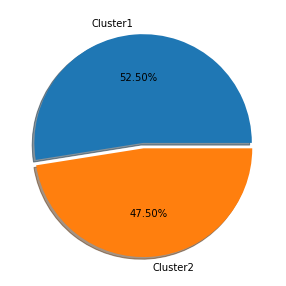

In [2396]:
print('\033[1;3mWe have 2 clusters:\033[0m')
print(pd.DataFrame(kmeans_lab).value_counts())
plt.figure(figsize=(10,5))
plt.pie(kmeans_lab.value_counts(), labels=['Cluster1', 'Cluster2'], 
        autopct='%.2f%%', shadow=True, explode=[0,0.05])
plt.show()

# <FONT COLOR = 'GREY'>KMEANS HYPERPARAMETER TUNING

# REBUILDING KMEANS MODEL

To find the optimum value of k

In [2397]:
k_range = range(2, 20)

In [2398]:
distortion = []
kvals = []
sil_score = []

for i in k_range:
    clf = KMeans(n_clusters = i , random_state= 111)
    clf.fit(df)
    errors = clf.inertia_
    print(f'\033[1;3mfor k = {i}\033[0m, \nInertia = {round(errors)}')
    distortion.append(errors)
    print()

for k = 2, 
Inertia = 387066

for k = 3, 
Inertia = 271397

for k = 4, 
Inertia = 195401

for k = 5, 
Inertia = 157214

for k = 6, 
Inertia = 122602

for k = 7, 
Inertia = 103233

for k = 8, 
Inertia = 86054

for k = 9, 
Inertia = 77002

for k = 10, 
Inertia = 68993

for k = 11, 
Inertia = 64412

for k = 12, 
Inertia = 59695

for k = 13, 
Inertia = 54895

for k = 14, 
Inertia = 51785

for k = 15, 
Inertia = 48972

for k = 16, 
Inertia = 46279

for k = 17, 
Inertia = 42998

for k = 18, 
Inertia = 40234

for k = 19, 
Inertia = 39039



In [2399]:
kvals = []
sil_score = []

for x in k_range:
    
    clusterer = KMeans(n_clusters=x, algorithm='elkan', random_state=42)
    cluster_labels = clusterer.fit_predict(df) #predicted values
    
    kvals.append(x)
    
    silhouette_avg = silhouette_score(df, cluster_labels)

    sil_score.append(silhouette_avg)
    
    print('For K=', x)
    print('Average silhouette score:', silhouette_avg)
    print()

For K= 2
Average silhouette score: 0.4793049017423563

For K= 3
Average silhouette score: 0.3766801400675223

For K= 4
Average silhouette score: 0.42245261332521894

For K= 5
Average silhouette score: 0.42309497779166094

For K= 6
Average silhouette score: 0.409528091044574

For K= 7
Average silhouette score: 0.40377132272288846

For K= 8
Average silhouette score: 0.40572559890744303

For K= 9
Average silhouette score: 0.4005794933207805

For K= 10
Average silhouette score: 0.3924166799637658

For K= 11
Average silhouette score: 0.3808920417326322

For K= 12
Average silhouette score: 0.37747671053338794

For K= 13
Average silhouette score: 0.3615235666494873

For K= 14
Average silhouette score: 0.34298075339150275

For K= 15
Average silhouette score: 0.3388941500834565

For K= 16
Average silhouette score: 0.3259726337547505

For K= 17
Average silhouette score: 0.31917406862943826

For K= 18
Average silhouette score: 0.3140739812670812

For K= 19
Average silhouette score: 0.323086578966

# ELBOW METHOD


In [2400]:
k_scores = pd.DataFrame(zip(k_range, distortion, sil_score), 
                        columns=['K Value','Inertia', 'Silhouette Score'], 
                        index=k_range)

In [2401]:
k_scores.set_index('K Value', inplace=True)

In [2405]:
print('K value with highest Silhouette Score: {}'.format(k_scores['Silhouette Score'].idxmax()))
print('K value with lowest Within Cluster Sum of Square Errors (Inertia): {}'.format(k_scores['Inertia'].idxmin()))


K value with highest Silhouette Score: 2
K value with lowest Within Cluster Sum of Square Errors (Inertia): 19


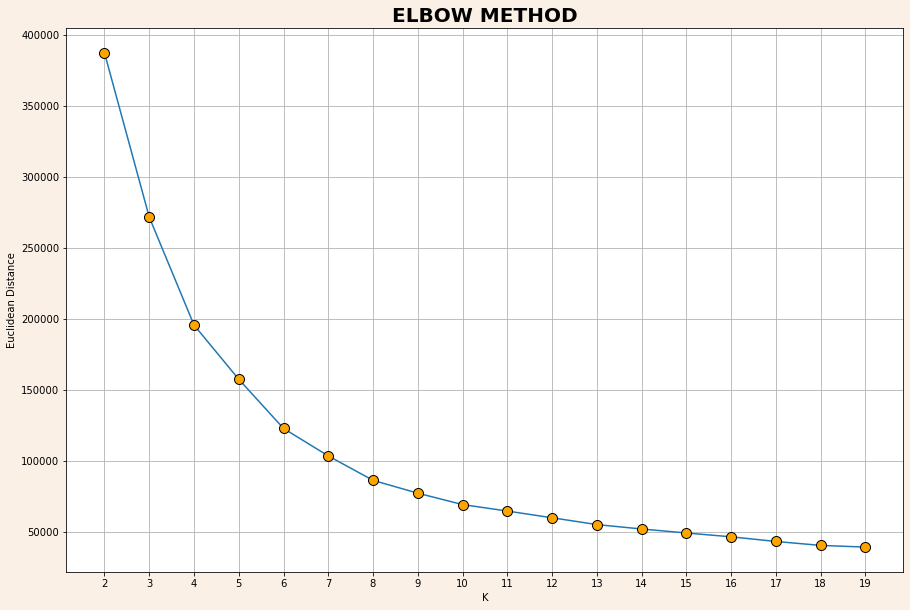

INTERPRETATION: K=5 or k=6 could be good K Values to choose


In [2406]:
plt.figure(figsize=(15,10), facecolor='linen')
plt.plot(np.arange(2,20), distortion, marker='o', markeredgecolor='black', markersize=10, markerfacecolor='orange')
plt.xlabel('K')
plt.ylabel('Euclidean Distance')
plt.title('ELBOW METHOD', fontweight='bold', size=20)
plt.xticks(li)
plt.grid()
plt.show()

print('INTERPRETATION: K=5 or k=6 could be good K Values to choose')

In [2407]:
optimum_k = pd.DataFrame(zip(kvals,sil_score), columns=['K', 'Silhouette Score'])

In [2408]:
li = list(np.arange(2,20))

In [2409]:
optimum_k.sort_values('Silhouette Score',ascending=False)

,K,Silhouette Score
0,2,0.479305
3,5,0.423095
2,4,0.422453
4,6,0.409528
6,8,0.405726
5,7,0.403771
7,9,0.400579
8,10,0.392417
9,11,0.380892
10,12,0.377477


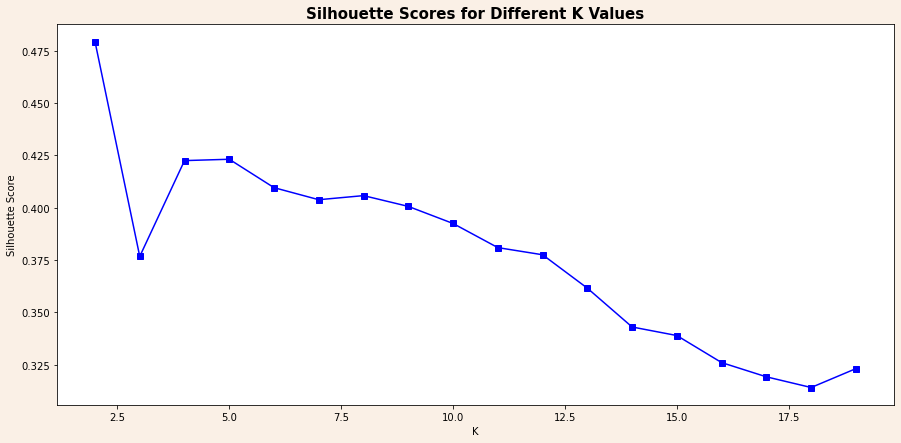

In [2410]:
plt.figure(figsize=(15,7), facecolor='linen')
plt.plot(optimum_k['K'], optimum_k['Silhouette Score'], 'bs-')
plt.title('Silhouette Scores for Different K Values', fontweight='bold', size=15)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.42620850066216065


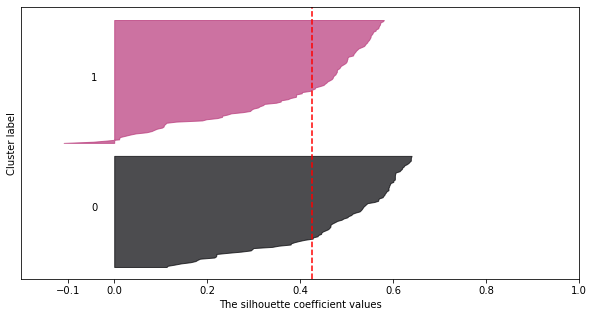

For n_clusters = 3 The average silhouette_score is : 0.4254725038202792


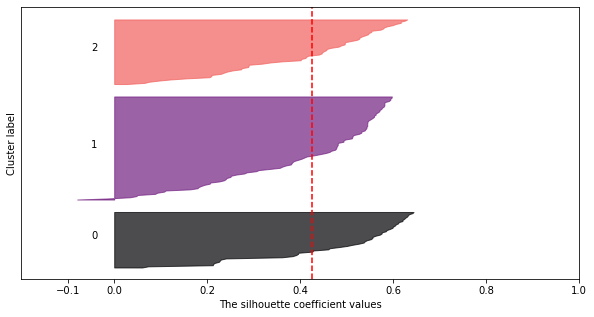

For n_clusters = 4 The average silhouette_score is : 0.43295184273333076


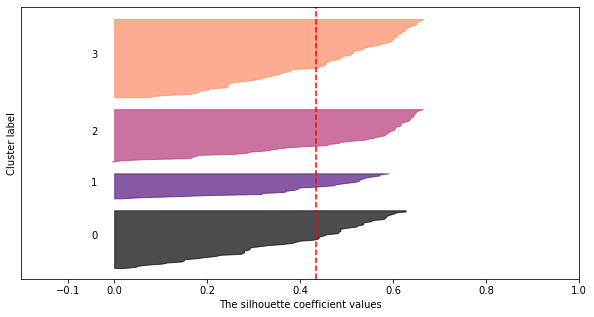

For n_clusters = 5 The average silhouette_score is : 0.40366620604639963


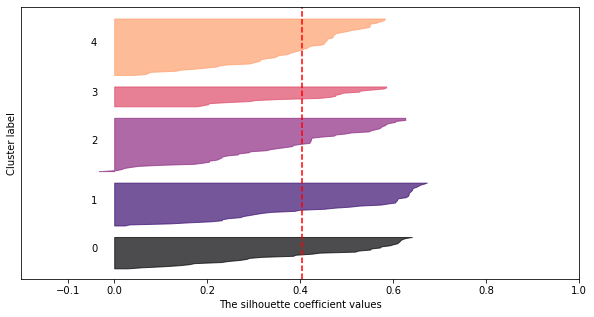

For n_clusters = 6 The average silhouette_score is : 0.3959805131239844


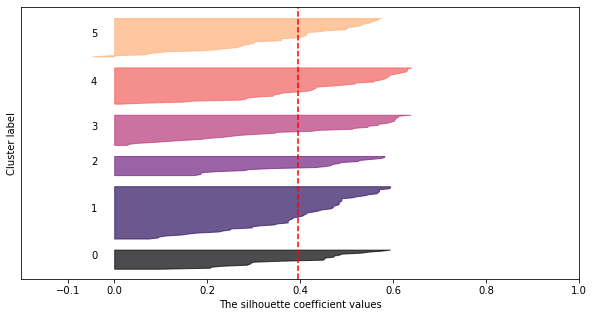

For n_clusters = 7 The average silhouette_score is : 0.38461608271423064


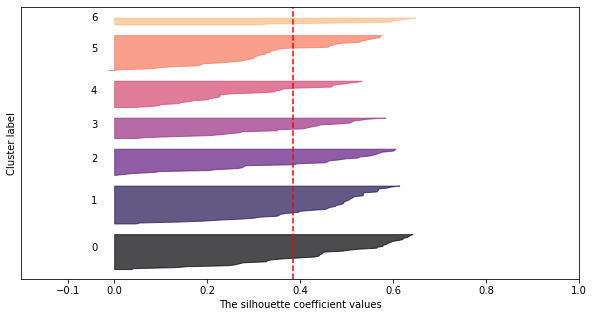

For n_clusters = 8 The average silhouette_score is : 0.38158600526395814


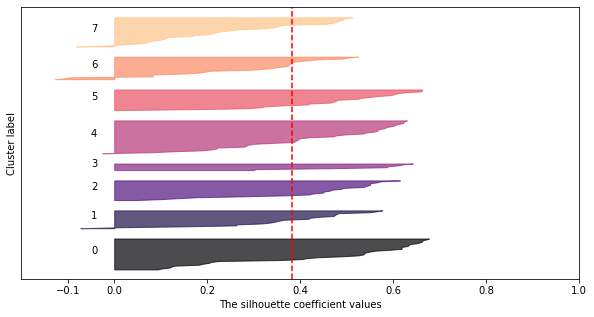

For n_clusters = 9 The average silhouette_score is : 0.3960142564251177


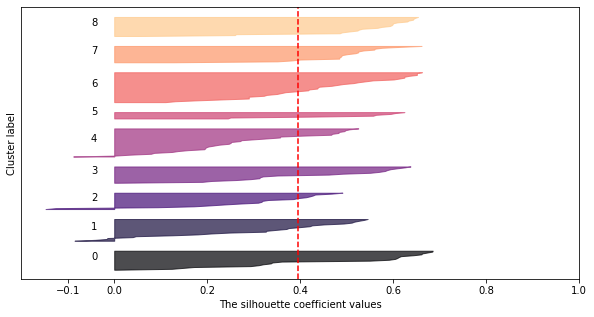

In [2411]:
for n_clusters in range_n_clusters: #iteration over each cluster size for creating models
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1, figsize=(10,5))
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(X)+ + (n_clusters + 1) * 10])
    
    #model creation
    model = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
    "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels) #Compute the Silhouette Coefficient for each sample. Mean value is obtained using silhouette_score

    y_lower = 10
    
    
    for i in range(n_clusters): #size of particular cluster for plotting
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] #values for each cluster
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0] #size of cluster
        y_upper = y_lower + size_cluster_i #creating variable for axis ticks
        
        color = cm.magma(float(i) / n_clusters) #creating colors list for each color
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
        0, ith_cluster_silhouette_values,
        facecolor=color, edgecolor=color, alpha=0.7)
             # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
     # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
        
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()

Silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

**Negative Silhouette Score:** Indicates that the samples could be assigned to the wrong cluster

**Postive Silhouette Score :** Indicates that the samples could be assigned to the correct cluster

**0 Silhouette Score :** Indicates potential overlapping of clusters


**For n=4 and n=5, we get best silhouette scores with lowest chance of wrong clusters being formed.**

# Rebuilding KMeans Model with K = 5

In [2412]:
kmeans_5 = KMeans(n_clusters=5, random_state=2).fit(df)

In [2413]:
kmeans_5_labels = kmeans_5.labels_
kmeans_5_clusters = kmeans_5.cluster_centers_

In [2414]:
cluster0 = kmeans_5_clusters[0]
cluster1 = kmeans_5_clusters[1]
cluster2 = kmeans_5_clusters[2]
cluster3 = kmeans_5_clusters[3]
cluster4 = kmeans_5_clusters[4]

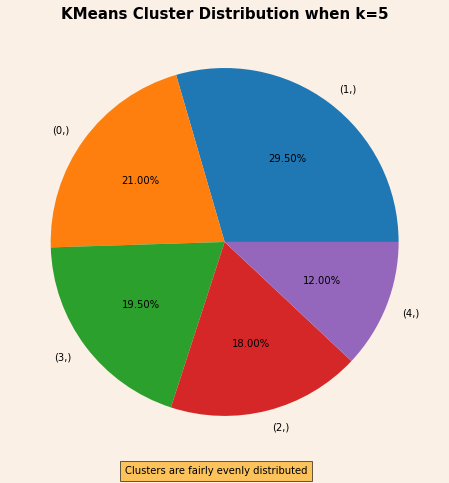

In [2519]:
x = pd.DataFrame(kmeans_5_labels)
plt.figure(figsize=(15,8), facecolor='linen')
plt.pie(x.value_counts(), autopct='%.2f%%', labels=x.value_counts().index)
plt.title('KMeans Cluster Distribution when k=5', fontweight='bold', size=15)
plt.figtext(0.42,0.1,'Clusters are fairly evenly distributed',  ha="left", fontsize=10, bbox={"facecolor":"orange", "alpha":0.6, "pad":5})
plt.show()

# <font color='grey'> <center>2D VISUALISATIONS FOR KMEANS

# a. KMEANS CLUSTERING WITH ALL FEATURES

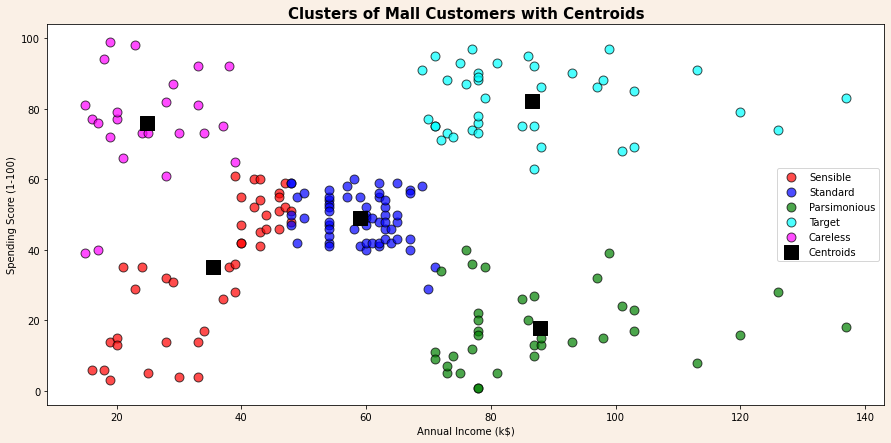

In [2416]:
plt.figure(figsize=(15,7), facecolor='linen')
plt.scatter(df.iloc[kmeans_5_labels == 0, 2], df.iloc[kmeans_5_labels == 0, 3], c = 'red', s = 80,alpha=0.7,edgecolor='black',label = 'Sensible')
plt.scatter(df.iloc[kmeans_5_labels == 1, 2], df.iloc[kmeans_5_labels == 1, 3], c = 'blue',  s = 80,alpha=0.7,edgecolor='black',label = 'Standard')
plt.scatter(df.iloc[kmeans_5_labels == 2, 2], df.iloc[kmeans_5_labels == 2, 3],  c = 'green',s = 80, alpha=0.7,edgecolor='black',label = 'Parsimonious')
plt.scatter(df.iloc[kmeans_5_labels == 3, 2], df.iloc[kmeans_5_labels == 3, 3],  c = 'cyan',s = 80,alpha=0.7,edgecolor='black', label = 'Target')
plt.scatter(df.iloc[kmeans_5_labels == 4, 2], df.iloc[kmeans_5_labels == 4, 3],  c = 'magenta',s = 80,alpha=0.7, edgecolor='black',label = 'Careless')

plt.scatter(cluster0[2], cluster0[3], color='black', marker='s', s=200, label='Centroids')
plt.scatter(cluster1[2], cluster1[3], color='black', marker='s', s=200)
plt.scatter(cluster2[2], cluster2[3], color='black', marker='s', s=200)
plt.scatter(cluster3[2], cluster3[3], color='black', marker='s', s=200)
plt.scatter(cluster4[2], cluster4[3], color='black', marker='s', s=200)

plt.title('Clusters of Mall Customers with Centroids', fontweight='bold', size=15 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Interpretation: 
We want to target customers with high income and high spending scores (cyan cluster)

# b. CLUSTERING WITH 2 COLUMNS

In [2495]:
def kmeans_plot(k,x):
    df_kmeans = df.loc[:,[x, 'Spending Score (1-100)']]
    kmeans_model = KMeans(n_clusters=k).fit(df_kmeans)
    kmeans_labels = kmeans_model.labels_
    df_kmeans['labels'] = kmeans_labels
    plt.figure(figsize=(15,7), facecolor='linen')
    
    if k == 3:
        df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
        df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
        df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
        plt.title(f'{x} VS Spending Score (K=3)', fontweight='bold', size=15)
        plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue',s = 80,alpha=0.7, edgecolor='black')
        plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
        plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')        
    
    
    if k == 4:
            df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
            df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
            df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
            df_kmeans3 = df_kmeans[df_kmeans['labels']==3]
            plt.title(f'{x} VS Spending Score (K=4)', fontweight='bold', size=15)
            plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')   
            plt.scatter(df_kmeans3[x], df_kmeans3['Spending Score (1-100)'], color='green',s = 80,alpha=0.7, edgecolor='black')
            
    
    elif k == 5:
            df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
            df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
            df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
            df_kmeans3 = df_kmeans[df_kmeans['labels']==3]
            df_kmeans4 = df_kmeans[df_kmeans['labels']==4]
            plt.title(f'{x} VS Spending Score (K=5)', fontweight='bold', size=15)            
            plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue' ,s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')   
            plt.scatter(df_kmeans3[x], df_kmeans3['Spending Score (1-100)'], color='cyan',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans4[x], df_kmeans4['Spending Score (1-100)'], color='grey',s = 80,alpha=0.7, edgecolor='black')
    elif k==6:
            df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
            df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
            df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
            df_kmeans3 = df_kmeans[df_kmeans['labels']==3]
            df_kmeans4 = df_kmeans[df_kmeans['labels']==4]
            df_kmeans5 = df_kmeans[df_kmeans['labels']==5]
            plt.title(f'{x} VS Spending Score (K=6)', fontweight='bold', size=15)        
            plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans3[x], df_kmeans3['Spending Score (1-100)'], color='green',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans4[x], df_kmeans4['Spending Score (1-100)'], color='grey',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans5[x], df_kmeans5['Spending Score (1-100)'], color='skyblue',s = 80,alpha=0.7, edgecolor='black')
        
    elif k==7:
            df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
            df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
            df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
            df_kmeans3 = df_kmeans[df_kmeans['labels']==3]
            df_kmeans4 = df_kmeans[df_kmeans['labels']==4]
            df_kmeans5 = df_kmeans[df_kmeans['labels']==5]
            df_kmeans6 = df_kmeans[df_kmeans['labels']==6]
            plt.title(f'{x} VS Spending Score (K=7)', fontweight='bold', size=15)        
            plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans3[x], df_kmeans3['Spending Score (1-100)'], color='green',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans4[x], df_kmeans4['Spending Score (1-100)'], color='grey',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans5[x], df_kmeans5['Spending Score (1-100)'], color='skyblue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans6[x], df_kmeans6['Spending Score (1-100)'], color='orange',s = 80,alpha=0.7, edgecolor='black')
            plt.xlabel('Customer')
            
    elif k==8:
            df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
            df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
            df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
            df_kmeans3 = df_kmeans[df_kmeans['labels']==3]
            df_kmeans4 = df_kmeans[df_kmeans['labels']==4]
            df_kmeans5 = df_kmeans[df_kmeans['labels']==5]
            df_kmeans6 = df_kmeans[df_kmeans['labels']==6]
            df_kmeans7 = df_kmeans[df_kmeans['labels']==7]
            plt.title(f'{x} VS Spending Score (K=8)', fontweight='bold', size=15)        
            plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans3[x], df_kmeans3['Spending Score (1-100)'], color='green',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans4[x], df_kmeans4['Spending Score (1-100)'], color='grey',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans5[x], df_kmeans5['Spending Score (1-100)'], color='skyblue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans6[x], df_kmeans6['Spending Score (1-100)'], color='orange',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans7[x], df_kmeans7['Spending Score (1-100)'], color='black',s = 80,alpha=0.7, edgecolor='black')

In [2496]:
import ipywidgets
from ipywidgets import interactive

In [2497]:
k_ran = np.arange(3,9); k_ran

array([3, 4, 5, 6, 7, 8])

In [2498]:
dd1 = widgets.Dropdown(options = df.columns, description='Column')
dd2 = widgets.IntSlider(values=6, min=3, max=8, step=1, description='K Value')
ui1 = widgets.HBox([dd1,dd2], box_style='info')

output1 = ipywidgets.interactive_output(kmeans_plot, {'x': dd1, 'k': dd2})

In [2499]:
display(ui1, output1)

HBox(box_style='info', children=(Dropdown(description='Column', options=('CustomerID', 'Age', 'Annual Income (…

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 1080x504 with 1 Axes>', '…

# Interpretation: 

As we go on increasing the value of k, we can see improved clustering taking place. At k=5, we get the best clusters.

# <font color='grey'> <center>3D VISUALISATION FOR KMEANS

In [2422]:
from mpl_toolkits.mplot3d import Axes3D

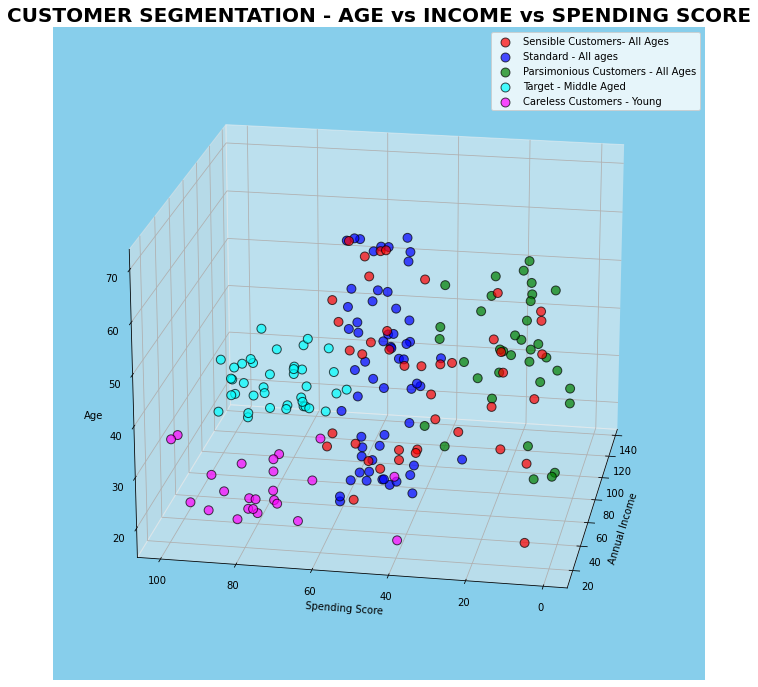

In [2423]:
# 3d scatter plot
fig = plt.figure(figsize=(18,12))

ax = fig.add_subplot(111, projection='3d', facecolor='skyblue')
ax.set_title('CUSTOMER SEGMENTATION - AGE vs INCOME vs SPENDING SCORE', size=20, fontweight='bold')
ax.scatter(df.iloc[kmeans_5_labels == 0, 2], df.iloc[kmeans_5_labels == 0, 3],df.iloc[kmeans_5_labels == 0, 1], c = 'red', label = 'Sensible Customers- All Ages',s = 80,alpha=0.7, edgecolor='black')
ax.scatter(df.iloc[kmeans_5_labels == 1, 2], df.iloc[kmeans_5_labels == 1, 3],df.iloc[kmeans_5_labels == 1, 1], c = 'blue', label = 'Standard - All ages',s = 80,alpha=0.7, edgecolor='black')
ax.scatter(df.iloc[kmeans_5_labels == 2, 2], df.iloc[kmeans_5_labels == 2, 3], df.iloc[kmeans_5_labels == 2, 1], c = 'green', label = 'Parsimonious Customers - All Ages',s = 80,alpha=0.7, edgecolor='black')
ax.scatter(df.iloc[kmeans_5_labels == 3, 2], df.iloc[kmeans_5_labels == 3, 3], df.iloc[kmeans_5_labels == 3, 1], c = 'cyan', label = 'Target - Middle Aged',s = 80,alpha=0.7, edgecolor='black')
ax.scatter(df.iloc[kmeans_5_labels == 4, 2], df.iloc[kmeans_5_labels == 4, 3], df.iloc[kmeans_5_labels == 4, 1], c = 'magenta', label = 'Careless Customers - Young',s = 80,alpha=0.7, edgecolor='black')

ax.legend()
ax.view_init(20, 190) #change 3d orientation
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')
plt.show()

# <CENTER>HIERARCHICAL CLUSTERING

### I. Selecting all columns

In [2424]:
hierarchical_model = AgglomerativeClustering().fit(df)

# Visualising using Dendrogram

We create dendograms in order to decide the number of clusters

In [2425]:
def draw_dendrogram(y):
    plt.figure(figsize=(20,10))
    dendrogram = sch.dendrogram(sch.linkage(df, method='ward'), labels=df.index)
    ax = plt.gca()
    ax.axhline(y, color='red', linestyle='--')
    plt.title('Customer Dendrogram',fontsize=30)
    plt.xlabel('Customers',fontsize=20)
    plt.ylabel('Euclidean distance', fontsize=20)
    plt.show()

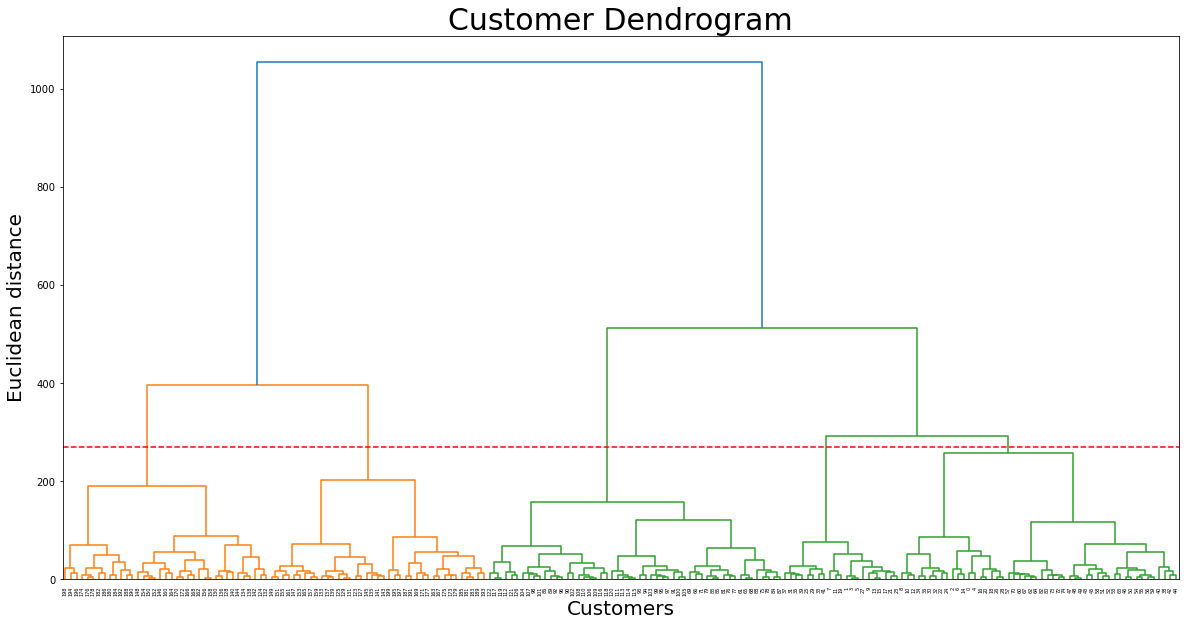

In [2426]:
draw_dendrogram(270)

In [2427]:
x = np.arange(0,400,1)

# Interpretation:
We have decided to set the number of clusters as 5. Let us fit our Agglomerative model to 5 clusters. 

In [2428]:
hier_cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')

In [2429]:
y_hc = hier_cluster.fit_predict(df); y_hc #prediction of cluster numbers

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int64)

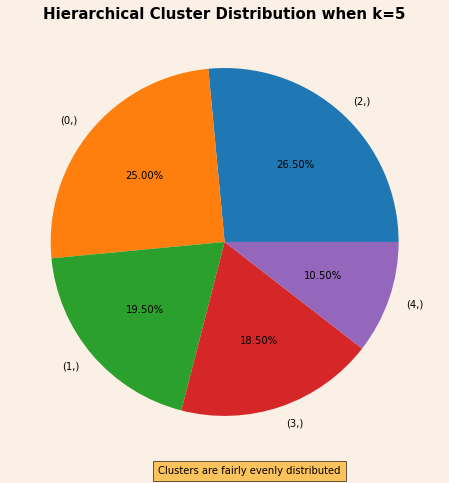

In [2520]:
pie_hier = pd.DataFrame(y_hc)
plt.figure(figsize=(10,8), facecolor='linen')
plt.title('Hierarchical Cluster Distribution when k=5', fontweight='bold', size=15)
plt.pie(pie_hier.value_counts(), autopct='%.2f%%', labels=pie_hier.value_counts().index)
plt.figtext(0.42,0.1,'Clusters are fairly evenly distributed',  ha="left", fontsize=10, bbox={"facecolor":"orange", "alpha":0.6, "pad":5})
plt.show()

# clusters are not of even size, unlike KMeans model.

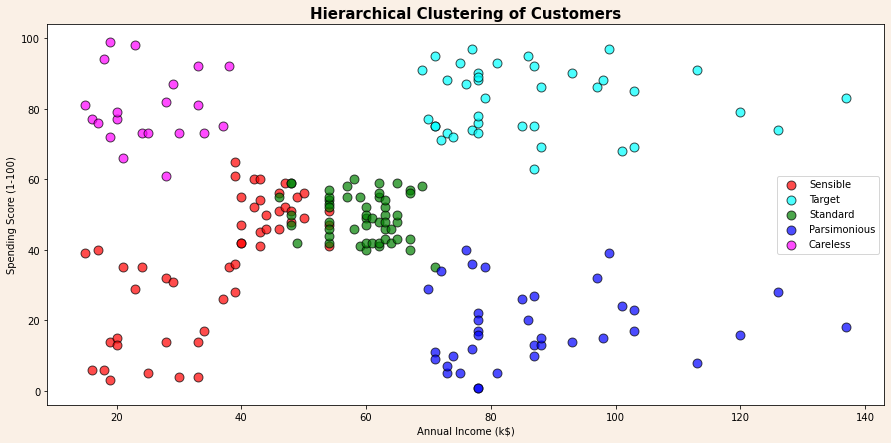

In [2431]:
plt.figure(figsize=(15,7), facecolor='linen')
plt.scatter(df.iloc[y_hc == 0, 2], df.iloc[y_hc == 0, 3], c = 'red', label = 'Sensible',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(df.iloc[y_hc == 1, 2], df.iloc[y_hc == 1, 3], c = 'cyan', label = 'Target',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(df.iloc[y_hc == 2, 2], df.iloc[y_hc == 2, 3], c = 'green', label = 'Standard',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(df.iloc[y_hc == 3, 2], df.iloc[y_hc == 3, 3], c = 'blue', label = 'Parsimonious',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(df.iloc[y_hc == 4, 2], df.iloc[y_hc == 4, 3], c = 'magenta', label = 'Careless',s = 80,alpha=0.7, edgecolor='black')
plt.title('Hierarchical Clustering of Customers', fontweight='bold', size=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Interpretation:

There is a fairly good clustering via hierarchical clustering. However there is a greater overlap between target and careful customers as compared to KMeans clustering. 

### II. Selecting only 2 columns of Spending Scores and Annual Income

In [2432]:
df1 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']]; df1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [2433]:
hier_cluster1 = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')

In [2434]:
y_hc1 = hier_cluster.fit_predict(df1); y_hc1 #prediction of cluster numbers

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

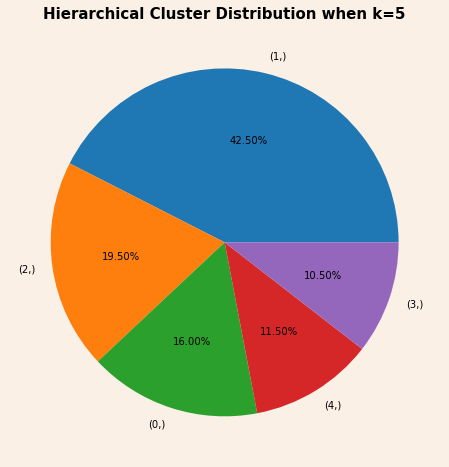

In [2509]:
pie_hier1 = pd.DataFrame(y_hc1)
plt.figure(figsize=(10,8), facecolor='linen')
plt.title('Hierarchical Cluster Distribution when k=5', fontweight='bold', size=15)
plt.pie(pie_hier1.value_counts(), autopct='%.2f%%', labels=pie_hier1.value_counts().index)
plt.show()

# clusters are not of even size, unlike KMeans model.

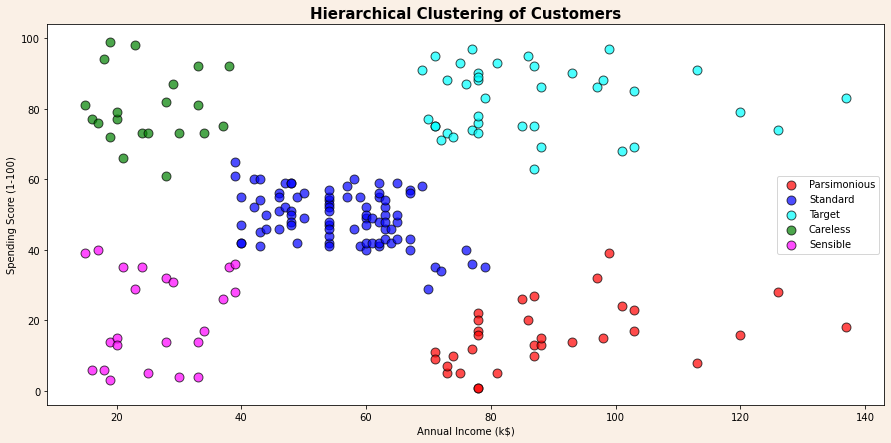

In [2437]:
plt.figure(figsize=(15,7), facecolor='linen')
plt.scatter(df1.iloc[y_hc1 == 0, 0], df1.iloc[y_hc1 == 0, 1], c = 'red', label = 'Parsimonious',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(df1.iloc[y_hc1 == 1, 0], df1.iloc[y_hc1 == 1, 1], c = 'blue', label = 'Standard',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(df1.iloc[y_hc1 == 2, 0], df1.iloc[y_hc1 == 2, 1], c = 'cyan', label = 'Target',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(df1.iloc[y_hc1 == 3, 0], df1.iloc[y_hc1 == 3, 1], c = 'green', label = 'Careless',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(df1.iloc[y_hc1 == 4, 0], df1.iloc[y_hc1 == 4, 1], c = 'magenta', label = 'Sensible',s = 80,alpha=0.7, edgecolor='black')
plt.title('Hierarchical Clustering of Customers', fontweight='bold', size=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [2487]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [2492]:
def hier_plot(k,x):
    hier_model = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
    df_kmeans = df.loc[:,[x, 'Spending Score (1-100)']]
    kmeans_labels = hier_cluster.fit_predict(df_kmeans)
    df_kmeans['labels'] = kmeans_labels
    plt.figure(figsize=(15,7), facecolor='linen')
    
    if k == 3:
        df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
        df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
        df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
        plt.title(f'{x} VS Spending Score (K=3)', fontweight='bold', size=15)
        plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue',s = 80,alpha=0.7, edgecolor='black')
        plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
        plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')        
    
    
    if k == 4:
            df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
            df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
            df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
            df_kmeans3 = df_kmeans[df_kmeans['labels']==3]
            plt.title(f'{x} VS Spending Score (K=4)', fontweight='bold', size=15)
            plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')   
            plt.scatter(df_kmeans3[x], df_kmeans3['Spending Score (1-100)'], color='green',s = 80,alpha=0.7, edgecolor='black')
            
    
    elif k == 5:
            df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
            df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
            df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
            df_kmeans3 = df_kmeans[df_kmeans['labels']==3]
            df_kmeans4 = df_kmeans[df_kmeans['labels']==4]
            plt.title(f'{x} VS Spending Score (K=5)', fontweight='bold', size=15)            
            plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue' ,s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')   
            plt.scatter(df_kmeans3[x], df_kmeans3['Spending Score (1-100)'], color='cyan',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans4[x], df_kmeans4['Spending Score (1-100)'], color='grey',s = 80,alpha=0.7, edgecolor='black')
    elif k==6:
            df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
            df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
            df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
            df_kmeans3 = df_kmeans[df_kmeans['labels']==3]
            df_kmeans4 = df_kmeans[df_kmeans['labels']==4]
            df_kmeans5 = df_kmeans[df_kmeans['labels']==5]
            plt.title(f'{x} VS Spending Score (K=6)', fontweight='bold', size=15)        
            plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans3[x], df_kmeans3['Spending Score (1-100)'], color='green',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans4[x], df_kmeans4['Spending Score (1-100)'], color='grey',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans5[x], df_kmeans5['Spending Score (1-100)'], color='skyblue',s = 80,alpha=0.7, edgecolor='black')
        
    elif k==7:
            df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
            df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
            df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
            df_kmeans3 = df_kmeans[df_kmeans['labels']==3]
            df_kmeans4 = df_kmeans[df_kmeans['labels']==4]
            df_kmeans5 = df_kmeans[df_kmeans['labels']==5]
            df_kmeans6 = df_kmeans[df_kmeans['labels']==6]
            plt.title(f'{x} VS Spending Score (K=7)', fontweight='bold', size=15)        
            plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans3[x], df_kmeans3['Spending Score (1-100)'], color='green',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans4[x], df_kmeans4['Spending Score (1-100)'], color='grey',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans5[x], df_kmeans5['Spending Score (1-100)'], color='skyblue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans6[x], df_kmeans6['Spending Score (1-100)'], color='orange',s = 80,alpha=0.7, edgecolor='black')

            
    elif k==8:
            df_kmeans0 = df_kmeans[df_kmeans['labels']==0]
            df_kmeans1 = df_kmeans[df_kmeans['labels']==1]
            df_kmeans2 = df_kmeans[df_kmeans['labels']==2]
            df_kmeans3 = df_kmeans[df_kmeans['labels']==3]
            df_kmeans4 = df_kmeans[df_kmeans['labels']==4]
            df_kmeans5 = df_kmeans[df_kmeans['labels']==5]
            df_kmeans6 = df_kmeans[df_kmeans['labels']==6]
            df_kmeans7 = df_kmeans[df_kmeans['labels']==7]
            plt.title(f'{x} VS Spending Score (K=8)', fontweight='bold', size=15)        
            plt.scatter(df_kmeans0[x], df_kmeans0['Spending Score (1-100)'], color='blue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans1[x], df_kmeans1['Spending Score (1-100)'], color='red',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans2[x], df_kmeans2['Spending Score (1-100)'], color='pink',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans3[x], df_kmeans3['Spending Score (1-100)'], color='green',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans4[x], df_kmeans4['Spending Score (1-100)'], color='grey',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans5[x], df_kmeans5['Spending Score (1-100)'], color='skyblue',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans6[x], df_kmeans6['Spending Score (1-100)'], color='orange',s = 80,alpha=0.7, edgecolor='black')
            plt.scatter(df_kmeans7[x], df_kmeans7['Spending Score (1-100)'], color='black',s = 80,alpha=0.7, edgecolor='black')

In [2493]:
dd1 = widgets.Dropdown(options = df.columns, description='Column')
dd2 = widgets.IntSlider(values=6, min=3, max=8, step=1, description='K Value')
ui1 = widgets.HBox([dd1,dd2], box_style='info')

output1 = ipywidgets.interactive_output(hier_plot, {'x': dd1, 'k': dd2})

In [2494]:
display(ui1, output1)

HBox(box_style='info', children=(Dropdown(description='Column', options=('CustomerID', 'Age', 'Annual Income (…

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 1080x504 with 1 Axes>', '…

# Interpretation: 
Better clustering is possible when we take only Annual Income and Spending Score

# <CENTER> DBSCAN CLUSTERING

In [2438]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

In [2439]:
db_model = DBSCAN(eps=1.1, min_samples=10).fit(df)
db_model

DBSCAN(eps=1.1, min_samples=10)

In [2440]:
labels = db_model.labels_; pd.DataFrame(labels).value_counts()

-1    200
dtype: int64

In [2441]:
df2 = df.copy()

In [2442]:
df2['Labels'] = labels; df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded,Labels
0,1,19,15,39,1,-1
1,2,21,15,81,1,-1
2,3,20,16,6,0,-1
3,4,23,16,77,0,-1
4,5,31,17,40,0,-1
...,...,...,...,...,...,...
195,196,35,120,79,0,-1
196,197,45,126,28,0,-1
197,198,32,126,74,1,-1
198,199,32,137,18,1,-1


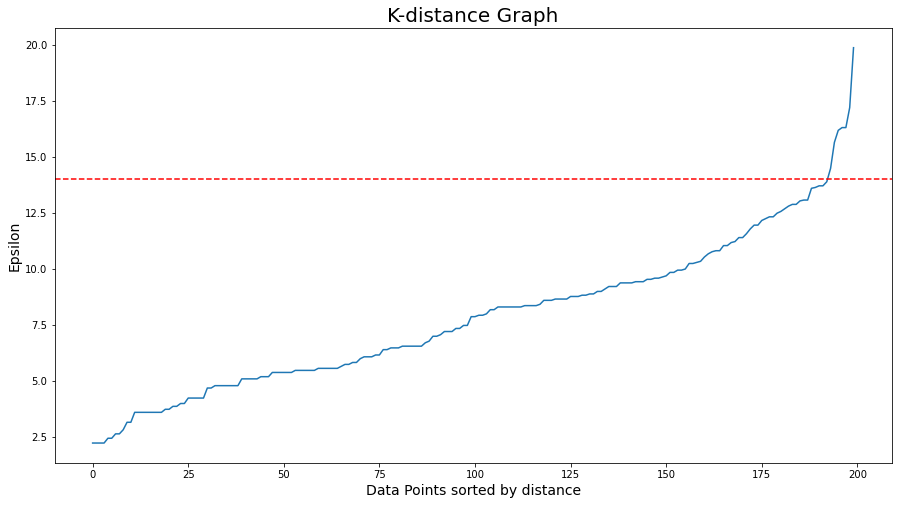

In [2443]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=14, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [2444]:
eps = 14

for min_samples in np.arange(1,20,1):
    print('Epsilon Value =',eps)
    print('Min_samples = ', min_samples)
    print()    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
    cluster_labels = clusterer.labels_
    x= cluster_labels+2 #as bincount takes only non-negative integers
    print('1. Cluster Predictions:', x)
    y = np.bincount(x)
    print()
    print('2. Number of records per cluster:', y)
    print()
    ii = np.nonzero(y)[0] #index of all clusters that are non-zero
    results = list(zip(ii,y[ii])) #list of clusters that are non-zero
    print('3. Cluster indices that are non-zero:',ii)
    print()
    print('4. Obtained clusters with no. of records: ', results)
    print()
    print('---'*40)
    print()

Epsilon Value = 14
Min_samples =  1

1. Cluster Predictions: [ 2  3  4  3  2  3  5  6  7  3  7  6  7  3  5  3  8  3  8  6  8  3  9  3
  9  3  8  3  8  3  9  3  9  3  9  3  9  3  9  3 10  3 11  3 11  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3 12 13 14  3 12 15 14 15 14 13 14 16 14 15 14 16 14 15 14 13 14
 16 14 17 14 18 14 18 14 18 14 18 14 19 14 19 14 20 14 21 14 20 14 20 14
 20 14 20 14 20 14 20 14 20 14 20 14 22 14 23 14 22 14 23 24 23 14 23 24
 25 14 26 27 26 27 28 29]

2. Number of records per cluster: [ 0  0  2 98  1  2  3  3  5  7  1  2  2  3 32  4  3  1  4  2  9  1  2  4
  2  1  2  2  1  1]

3. Cluster indices that are non-zero: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]

4. Obtained clusters with no. of records:  [(2, 2), (3, 98), (4, 1), (5, 2

lets try with epsilon value = 15 and minsamples = 5

In [2445]:
dbscan_model = DBSCAN(eps=14, min_samples=5).fit(df)

In [2446]:
pd.DataFrame(dbscan_model.labels_).value_counts()

 0    93
-1    66
 2    31
 1     5
 3     5
dtype: int64

In [2447]:
dbscan_model.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1,  0, -1,  0,  1,  0,  1,  0,
        1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0, -1, -1,  2, -1, -1, -1,  2, -1,  2, -1,  2, -1,  2,
       -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
        2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [2448]:
dbscan_lab = pd.DataFrame(dbscan_model.labels_, columns=['label'])

In [2449]:
df_dbscan1 = pd.concat([df, dbscan_lab], axis=1)

In [2450]:
df_dbscan1

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded,label
0,1,19,15,39,1,-1
1,2,21,15,81,1,0
2,3,20,16,6,0,-1
3,4,23,16,77,0,0
4,5,31,17,40,0,-1
...,...,...,...,...,...,...
195,196,35,120,79,0,-1
196,197,45,126,28,0,-1
197,198,32,126,74,1,-1
198,199,32,137,18,1,-1


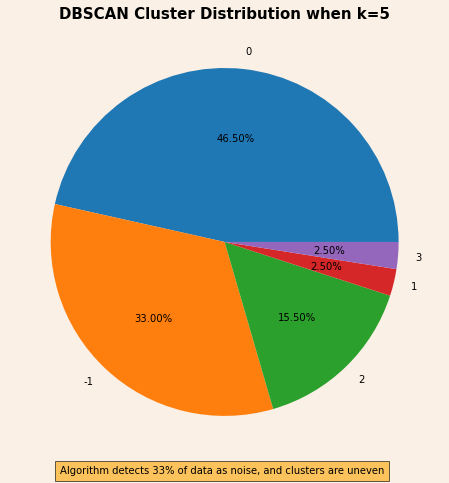

In [2525]:
plt.figure(figsize=(15,8), facecolor='linen')
plt.pie(df_dbscan1.label.value_counts(), autopct='%.2f%%', labels=df_dbscan1.label.value_counts().index)
plt.title('DBSCAN Cluster Distribution when k=5', fontweight='bold', size=15)
plt.figtext(0.36,0.1,'Algorithm detects 33% of data as noise, and clusters are uneven',  ha="left", fontsize=10, bbox={"facecolor":"orange", "alpha":0.6, "pad":5})
plt.show()

In [2451]:
Noise = df_dbscan1[df_dbscan1['label']==-1]
cluster0 = df_dbscan1[df_dbscan1['label']==0]
cluster1 = df_dbscan1[df_dbscan1['label']==1]
cluster2 = df_dbscan1[df_dbscan1['label']==2]
cluster3 = df_dbscan1[df_dbscan1['label']==3]

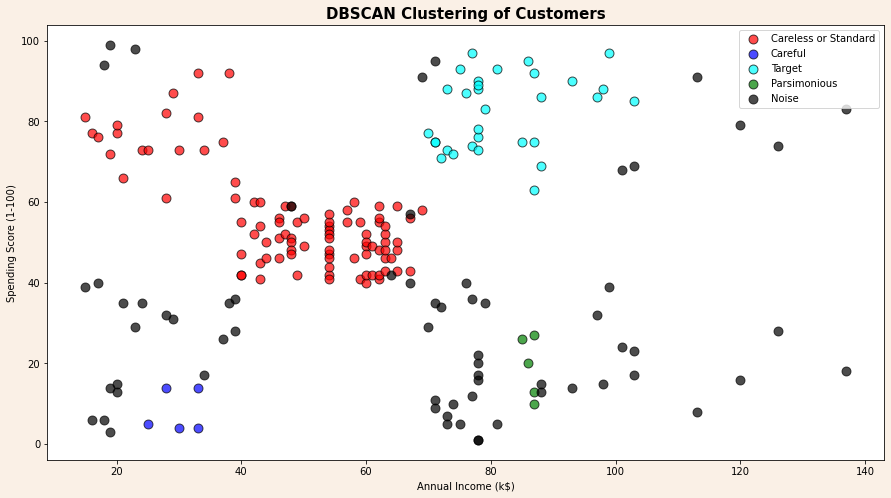

In [2452]:
plt.figure(figsize=(15,8), facecolor='linen')
plt.scatter(cluster0['Annual Income (k$)'], cluster0['Spending Score (1-100)'], c = 'red', label = 'Careless or Standard',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(cluster1['Annual Income (k$)'], cluster1['Spending Score (1-100)'], c = 'blue', label = 'Careful',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(cluster2['Annual Income (k$)'], cluster2['Spending Score (1-100)'], c = 'cyan', label = 'Target',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(cluster3['Annual Income (k$)'], cluster3['Spending Score (1-100)'], c = 'green', label = 'Parsimonious',s = 80,alpha=0.7, edgecolor='black')
plt.scatter(Noise['Annual Income (k$)'], Noise['Spending Score (1-100)'],  label = 'Noise', c='Black',s = 80,alpha=0.7, edgecolor='black')

plt.title('DBSCAN Clustering of Customers', fontweight='bold', size=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# CONCLUSION

**After the indepth analysis, we can infer from the above three algorithms that:**

We want to target customers with high income and high spending scores (cyan cluster)
    
1. KMeans clustering with all features seems to get good clustering. However, customers who are in the 'standard' category tend to have a few anomaly points that overlap with it (in all clusters except 'target' category)

2. In terms of the three features of age, income and spending score, we can conclude that those who are middle aged tend to be part of the target category. While younger customers tend to be more careless spenders, older customers can be mostly considered careful, standard or frugal spenders in our dataset. 

3. Hierarchical Clustering is capable of incorporating clusters of uneven sizes. This does not seem beneficial in our case, as the clusters seem worse than those in KMeans clustering.....?
However, after selecting only two columns of income and spending score, the clustering significantly improves and there is no overlapping of datapoints in our graph.

4. As the density varies between clusters, DBSCAN is not able to capture all the clusters properly and assigns large number of points as noise points (66). Thus we can conclue that DBSCAN is not ideal for our case study. 


5. Therefore, if we wish to solely compare the income of customers with their spending score to see which category they fall in, we can determine this using hierarchical clustering. However, for a better overall analysis, we would prefer KMeans.

---

# MAKING PREDICTIONS FOR CUSTOMER CATEGORY

In [2453]:
#model used
kmeans_5

KMeans(n_clusters=5, random_state=2)

In [2551]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [2556]:
def predict():
    print('\033[1;36mCUSTOMER SEGMENTATION APP - MAKE A CLUSTER PREDICTION!\033[0m')
    
    inputs = []
    
    id1 = int(input('Please Enter A Customer ID: '))
    
    if id1 > 200 or id1<1:
        print('\033[1;31mPlease enter a Valid Customer ID\033[0m')
        id1 = int(input('\033[1;3mPlease Enter A Customer ID:\033[0m '))
        if id1 <= 200 or id1>=0:
            print('\033[1;32mAdded!\033[0m')
            inputs.append(id1)
            
    else:
        if id1 <= 200 and id1>=1:
            print('\033[1;32mAdded!\033[0m')
            inputs.append(id1)
        
    gender = int(input('Please Enter Customers Gender (Male = 1, Female = 0):  '))
    
    if gender not in [0,1]:
        print('\033[1;31mPlease enter a Valid Customer Gender\033[0m')
        gender = int(input('Please Enter Customers Gender (Male = 1, Female = 0):  '))
        if gender in [0,1]:
            print('\033[1;32mAdded!\033[0m')
            inputs.append(gender)    
    else:
        if gender in [0,1]:
            print('\033[1;32mAdded!\033[0m')
            inputs.append(gender)
    
    custAge = int(input('Please Enter Customer Age: '))
    
    if custAge<18 or custAge>70:
        print('\033[1;31mPlease enter a valid Customer Age\033[0m')
        custAge = int(input('\033[1;3mPlease Enter Customer Age between 18 and 70:\033[0m'))
        if custAge>=18 and custAge<=70:
            print('\033[1;32mAdded!\033[0m')
            inputs.append(custAge)
    else:
        if custAge>=18 and custAge<=70:
            print('\033[1;32mAdded!\033[0m')
            inputs.append(custAge)
        
    custIncome = int(input('Please Enter Customer\'s Annual income (in $(Thousands)): '))
    
    if custIncome<20 or custIncome>137:
        print('\033[1;31mAnnual income must be between 15 and 137!\033[0m')
        custIncome = int(input('\033[1;3mPlease Enter Customer\'s Annual income (in $(Thousands)):\033[0m'))
        if custIncome>=20 and custIncome<=137: 
            print('\033[1;32mAdded!\033[0m')
            inputs.append(custIncome) 

    else:
        if custIncome>=20 and custIncome<=137: 
            print('\033[1;32mAdded!\033[0m')
            inputs.append(custIncome)  
    
    
    spsc = int(input('Please Enter Customer\'s Spending Score (1-100): '))
    if spsc<0 or spsc>100:
        print('\033[1;31mPlease enter a Valid Spending Score\033[0m')
        spsc = int(input('Please Enter Customer\'s Spending Score (1-100): '))
        if spsc>=0 and spsc<=100:
            print('\033[1;32mAdded!\033[0m')
            inputs.append(spsc) 

    else:
        if spsc>=0 and spsc<=100:
            print('\033[1;32mAdded!\033[0m')
            inputs.append(spsc)  
        
    inputs = np.array(inputs).reshape(-1,5)
    lab = kmeans_5.predict(inputs)
    print()
    print('➤Analysing...')
    print()
    print('➤Assigning the optimal cluster...')
    print()
    print('➤Report Ready!')
    print()
    print('---'*30)
    print('                      \033[1;3m─── ∘°❉°∘ Customer Segmentation Analysis ∘°❉°∘ ───\033[0m')
    print('---'*30)
    
    if lab == 0:
        print('\033[1;3mCustomer Cluster Type\033[0m : Customer is sensible.') 
        print('\033[1;3mDetails\033[0m : Will not overspend if income is low.')
        print('\033[1;31mNot a target customer\033[0m')
        
    elif lab ==1:
        print('\033[1;3mCustomer Cluster Type\033[0m : Average Customer.')
        print('\033[1;3mDetails\033[0m : Will not overspend or underspend.')
        print('\033[1;3mNot a target customer\033[0m')
        
    elif lab ==2:
        print('\033[1;3mCustomer Cluster Type\033[0m :Customer is Careful.')
        print('\033[1;3mDetails\033[0m : Will aim to spend the least at the mall despite having higher income.')
        print('\033[1;31mNot a target customer\033[0m')
        
    elif lab ==3:
        print('\033[1;32mCustomer Cluster Type: Target customer!\033[0m')
        print('\033[1;3mDetails\033[0m :This customer has the income to support their heavy spending.')
        print(' Marketing team should be noted so that strategies beneficial to stores as well as target customers can be formulated accordingly.')
        
    elif lab == 4:
        if gender == 1:
            print('\033[1;3mCustomer Cluster Type\033[0m : Customer is Careless.')
            print('\033[1;3mDetails\033[0m : Tends to overspend despite not having the income to support him.')
            print('\033[1;31mNot a target customer\033[0m')
        else:
            print('\033[1;3mCustomer Cluster Type\033[0m : Customer is Careless.')
            print('\033[1;3mDetails\033[0m : She tends to overspend despite not having the income to support her.')
            print('\033[1;31mNot a target customer\033[0m')
    print('---'*30)
    print('Thank you for using the Customer Segmentation App!')

In [2557]:
predict()

CUSTOMER SEGMENTATION APP - MAKE A CLUSTER PREDICTION!
Please Enter A Customer ID: 10
Added!
Please Enter Customers Gender (Male = 1, Female = 0):  2
Please enter a Valid Customer Gender
Please Enter Customers Gender (Male = 1, Female = 0):  1
Added!
Please Enter Customer Age: 30
Added!
Please Enter Customer's Annual income (in $(Thousands)): 20
Added!
Please Enter Customer's Spending Score (1-100): 30
Added!

➤Analysing...

➤Assigning the optimal cluster...

➤Report Ready!

------------------------------------------------------------------------------------------
                      ─── ∘°❉°∘ Customer Segmentation Analysis ∘°❉°∘ ───
------------------------------------------------------------------------------------------
Customer Cluster Type : Customer is sensible.
Details : Will not overspend if income is low.
Not a target customer
------------------------------------------------------------------------------------------
Thank you for using the Customer Segmentation App!


---